# Regresión lineal por mínimos cuadrados: modelo

Regresión lineal por mínimos cuadrados es una normal condicional para regresión, $y\in\mathbb{R}$,
$$p(y\mid\boldsymbol{x}, \boldsymbol{\theta})%
=\mathcal{N}(y\mid w_0+\boldsymbol{w}^t\boldsymbol{x},\sigma^2),$$
donde los pesos de regresión $\boldsymbol{w}$ pueden absorber el sesgo $w_0$ por simplicidad.

Se dice que la regresión lineal es **simple** si la entrada es unidimensional; si no, se dice que es **múltiple**.

## Regresión polinómica simple

Decimos que la regresión es **polinómica** si la entrada, simple o múltiple, se procesa mediante un **extractor de características polinómico** $\phi$.

En particular, **regresión polinómica simple** es:
$$
p(y\mid x,\boldsymbol\theta)%
=\mathcal{N}(y\mid f(x;\boldsymbol{w}),\sigma^2)
$$
con predictor de media linealmente dependiente de un extractor de características polinómico de grado $D$,
$\boldsymbol\phi(x)=[1, x, x^2, \dotsc, x^D]$,
$$
f(x;\boldsymbol{w})%
=\boldsymbol{w}^t\boldsymbol\phi(x)%
=\sum_{d=0}^D w_d\,x^d
$$
y varianza $\sigma^2$ fija (regresión homocedástica).

El estimador de mínimo riesgo (Bayes) de $y$ con pérdida cuadrática, 
$\ell_2(y-\pi(\boldsymbol{x}))=(y-\pi(\boldsymbol{x}))^2$, 
es la media a posteriori:
$$
\pi^*(\boldsymbol{x})%
=\operatorname*{argmin}\limits_{\pi(\boldsymbol{x})}\;%
R(y\mid\boldsymbol{x})%
=\operatorname*{argmin}\limits_{\pi(\boldsymbol{x})}\;%
\mathbb{E}_{p(y\mid\boldsymbol{x},\boldsymbol\theta)}[(y-\pi(\boldsymbol{x}))^2]%
=\mathbb{E}[y\mid\boldsymbol{x}]%
=f(\boldsymbol{x};\boldsymbol{w})%
$$
Suponiendo que conocemos $\boldsymbol\theta$ y dado $\boldsymbol{x}$, el riesgo de Bayes (teórico) es la varianza:
$$R^*(y\mid\boldsymbol{x})%
=\mathbb{E}_{p(y\mid\boldsymbol{x},\boldsymbol\theta)}[(y-\pi^*(\boldsymbol{x}))^2]%
=\mathbb{E}_{p(y\mid\boldsymbol{x},\boldsymbol\theta)}[(y-f(\boldsymbol{x};\boldsymbol{w}))^2]%
=\sigma^2$$

**Ejemplo:** $\;f(x;\boldsymbol{w})=w_0+w_1x+w_2x^2$ $\;$ con $\;w_0=0$, $\;w_1=-1.5$ $\;$ y $\;w_2=1/9$; $\;$ $\;\sigma^2=4\;$; $\;$ para $x\in[0,20]$

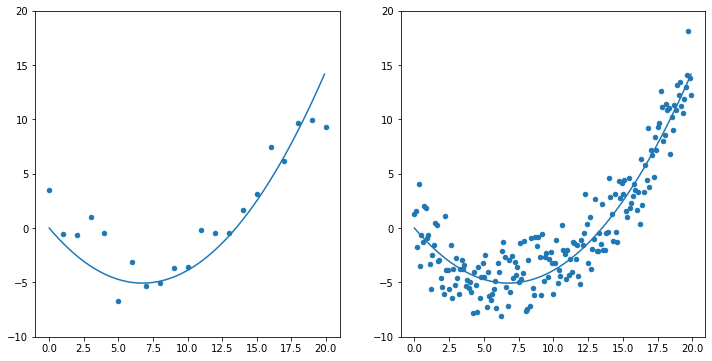

In [5]:
import numpy as np
import matplotlib.pyplot as plt

w0 = 0; w1 = -1.5; w2 = 1/9; sigma = 2; N = 21; np.random.seed(0)
X_train = np.linspace(0.0, 20, N); X_test = np.arange(0.0, 20, 0.1)
y_train = w0 + w1 * X_train + w2 * X_train * X_train + np.random.normal(0, sigma, X_train.shape)
y_test = w0 + w1 * X_test + w2 * X_test * X_test + np.random.normal(0, sigma, X_test.shape)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_ylim([-10, 20]); axes[0].scatter(X_train, y_train, s=20)
axes[0].plot(X_test, w0 + w1 * X_test + w2 * X_test * X_test)
axes[1].set_ylim([-10, 20]); axes[1].scatter(X_test, y_test, s=20)
axes[1].plot(X_test, w0 + w1 * X_test + w2 * X_test * X_test);